# BPI 2017 Event Log: Activity Duration Analysis

This notebook analyzes activity durations in the BPI 2017 event log and visualizes the top 10 activities by average duration.

## Dataset Overview
- **Total Cases**: 4,726
- **Total Events**: 181,063
- **Total Activities**: 25
- **Average Events per Case**: 38.31
- **Log Timeframe**: January 1, 2016 - February 1, 2017 (396 days)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11


## Activity Duration Data

The following data was extracted using MCP tools from the BPI 2017 event log:


In [4]:
# Activity duration data from MCP performance analysis
activity_data = [
    {"name": "A_Accepted", "avg_duration": 0.6904193755588498, "median_duration": 0.04910722222222222, "frequency": 4722, "is_bottleneck": True},
    {"name": "A_Cancelled", "avg_duration": -1.9670015870716178, "median_duration": 7.777777777777777e-6, "frequency": 1553, "is_bottleneck": False},
    {"name": "A_Complete", "avg_duration": 0.03499359658137832, "median_duration": 0.03749972222222222, "frequency": 4703, "is_bottleneck": True},
    {"name": "A_Concept", "avg_duration": 15.669169839766205, "median_duration": 1.5891775, "frequency": 4724, "is_bottleneck": True},
    {"name": "A_Create Application", "avg_duration": 0.0000911527248789204, "median_duration": 0.000011944444444444443, "frequency": 4726, "is_bottleneck": False},
    {"name": "A_Denied", "avg_duration": -1.5584728799223517, "median_duration": 8.888888888888888e-6, "frequency": 601, "is_bottleneck": False},
    {"name": "A_Incomplete", "avg_duration": -0.011391992826398856, "median_duration": 0.008113611111111111, "frequency": 3485, "is_bottleneck": True},
    {"name": "A_Pending", "avg_duration": -0.8573298760249902, "median_duration": 8.333333333333333e-7, "frequency": 2561, "is_bottleneck": False},
    {"name": "A_Submitted", "avg_duration": 0.0057549900348779276, "median_duration": 0.00008194444444444444, "frequency": 3122, "is_bottleneck": False},
    {"name": "A_Validating", "avg_duration": -0.3525902158552023, "median_duration": 0.007186111111111111, "frequency": 5881, "is_bottleneck": True},
    {"name": "O_Accepted", "avg_duration": 2.5747529901196047e-6, "median_duration": 1.111111111111111e-6, "frequency": 2564, "is_bottleneck": False},
    {"name": "O_Cancelled", "avg_duration": 3.9989498995848, "median_duration": 2.777777777777778e-6, "frequency": 2462, "is_bottleneck": False},
    {"name": "O_Create Offer", "avg_duration": 0.0002950579474472149, "median_duration": 0.00026416666666666667, "frequency": 6457, "is_bottleneck": False},
    {"name": "O_Created", "avg_duration": 0.8429984460017552, "median_duration": 0.006856944444444444, "frequency": 6457, "is_bottleneck": True},
    {"name": "O_Refused", "avg_duration": 4.1630068803981844e-6, "median_duration": 2.777777777777778e-6, "frequency": 759, "is_bottleneck": False},
    {"name": "O_Returned", "avg_duration": 0.675755716680835, "median_duration": 0.046227222222222225, "frequency": 3529, "is_bottleneck": True},
    {"name": "O_Sent (mail and online)", "avg_duration": 19.427641378240896, "median_duration": 4.722222222222222e-6, "frequency": 5974, "is_bottleneck": False},
    {"name": "O_Sent (online only)", "avg_duration": 57.7194743524712, "median_duration": 1.2254244444444444, "frequency": 299, "is_bottleneck": True},
    {"name": "W_Assess potential fraud", "avg_duration": 9.050815332175926, "median_duration": 0.021951250000000002, "frequency": 480, "is_bottleneck": True},
    {"name": "W_Call after offers", "avg_duration": 57.61821405288892, "median_duration": 0.004465, "frequency": 27417, "is_bottleneck": False},
    {"name": "W_Call incomplete files", "avg_duration": 12.431546881005174, "median_duration": 0.023397499999999998, "frequency": 24805, "is_bottleneck": True},
    {"name": "W_Complete application", "avg_duration": 4.692650388086459, "median_duration": 0.000012777777777777777, "frequency": 21878, "is_bottleneck": False},
    {"name": "W_Handle leads", "avg_duration": 0.4685871324210429, "median_duration": 0.009710416666666666, "frequency": 7198, "is_bottleneck": True},
    {"name": "W_Shortened completion", "avg_duration": 15.885293556763283, "median_duration": 0.0035025000000000004, "frequency": 46, "is_bottleneck": False},
    {"name": "W_Validate application", "avg_duration": 7.561561655865125, "median_duration": 0.00026277777777777774, "frequency": 29934, "is_bottleneck": False}
]

# Create DataFrame
df = pd.DataFrame(activity_data)
print(f"Total activities: {len(df)}")
df.head(10)


Total activities: 25


,name,avg_duration,median_duration,frequency,is_bottleneck
0,A_Accepted,0.690419,4.910722e-02,4722,True
1,A_Cancelled,-1.967002,7.777778e-06,1553,False
2,A_Complete,0.034994,3.749972e-02,4703,True
3,A_Concept,15.669170,1.589177e+00,4724,True
4,A_Create Application,0.000091,1.194444e-05,4726,False
5,A_Denied,-1.558473,8.888889e-06,601,False
6,A_Incomplete,-0.011392,8.113611e-03,3485,True
7,A_Pending,-0.857330,8.333333e-07,2561,False
8,A_Submitted,0.005755,8.194444e-05,3122,False
9,A_Validating,-0.352590,7.186111e-03,5881,True


## Data Preprocessing and Filtering

Note: Some activities show negative average durations, which indicates data quality issues or activities with complex timing patterns. For visualization purposes, we'll focus on activities with positive durations.


In [5]:
# Filter out activities with negative durations for clearer analysis
df_positive = df[df['avg_duration'] > 0].copy()

# Convert durations from hours to more readable units
df_positive['avg_duration_minutes'] = df_positive['avg_duration'] * 60
df_positive['median_duration_minutes'] = df_positive['median_duration'] * 60

# Sort by average duration (descending) and get top 10
top_10_activities = df_positive.nlargest(10, 'avg_duration')

print(f"Activities with positive durations: {len(df_positive)}")
print(f"\nTop 10 Activities by Average Duration:")
print(top_10_activities[['name', 'avg_duration', 'avg_duration_minutes', 'frequency', 'is_bottleneck']].to_string(index=False))


Activities with positive durations: 20

Top 10 Activities by Average Duration:
                    name  avg_duration  avg_duration_minutes  frequency  is_bottleneck
    O_Sent (online only)     57.719474           3463.168461        299           True
     W_Call after offers     57.618214           3457.092843      27417          False
O_Sent (mail and online)     19.427641           1165.658483       5974          False
  W_Shortened completion     15.885294            953.117613         46          False
               A_Concept     15.669170            940.150190       4724           True
 W_Call incomplete files     12.431547            745.892813      24805           True
W_Assess potential fraud      9.050815            543.048920        480           True
  W_Validate application      7.561562            453.693699      29934          False
  W_Complete application      4.692650            281.559023      21878          False
             O_Cancelled      3.998950            2

In [ ]:
## Visualization 1: Top 10 Activities by Average Duration


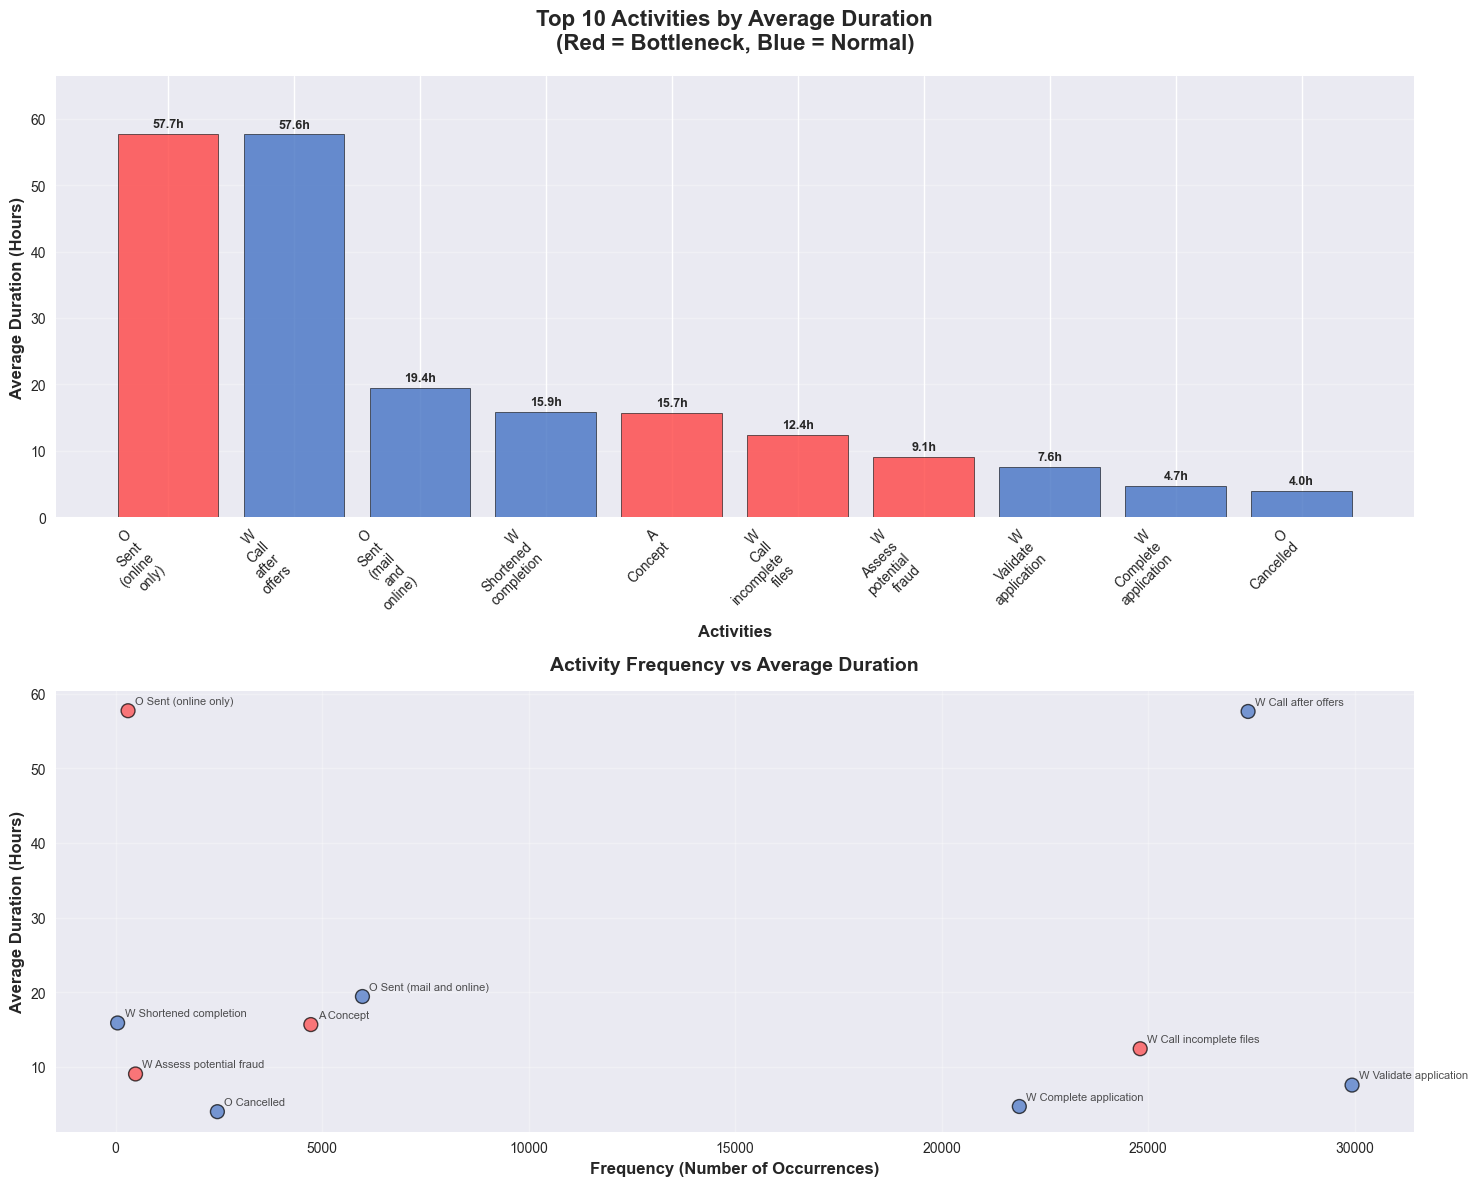

In [6]:
# Create the main visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top plot: Bar chart of average durations
colors = ['#ff4444' if bottleneck else '#4472c4' for bottleneck in top_10_activities['is_bottleneck']]
bars = ax1.bar(range(len(top_10_activities)), 
               top_10_activities['avg_duration'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

ax1.set_title('Top 10 Activities by Average Duration\n(Red = Bottleneck, Blue = Normal)', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Activities', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Duration (Hours)', fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(top_10_activities)))
ax1.set_xticklabels([name.replace('_', '\n').replace(' ', '\n') for name in top_10_activities['name']], 
                   rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_10_activities['avg_duration'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(top_10_activities['avg_duration']) * 0.01,
            f'{value:.1f}h', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, max(top_10_activities['avg_duration']) * 1.15)

# Bottom plot: Frequency vs Duration scatter plot
scatter = ax2.scatter(top_10_activities['frequency'], 
                     top_10_activities['avg_duration'],
                     c=colors, s=100, alpha=0.7, edgecolors='black', linewidth=1)

ax2.set_title('Activity Frequency vs Average Duration', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Frequency (Number of Occurrences)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Duration (Hours)', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# Add labels to points
for idx, row in top_10_activities.iterrows():
    ax2.annotate(row['name'].replace('_', ' '), 
                (row['frequency'], row['avg_duration']),
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()


In [ ]:
## Visualization 2: Duration Distribution Analysis


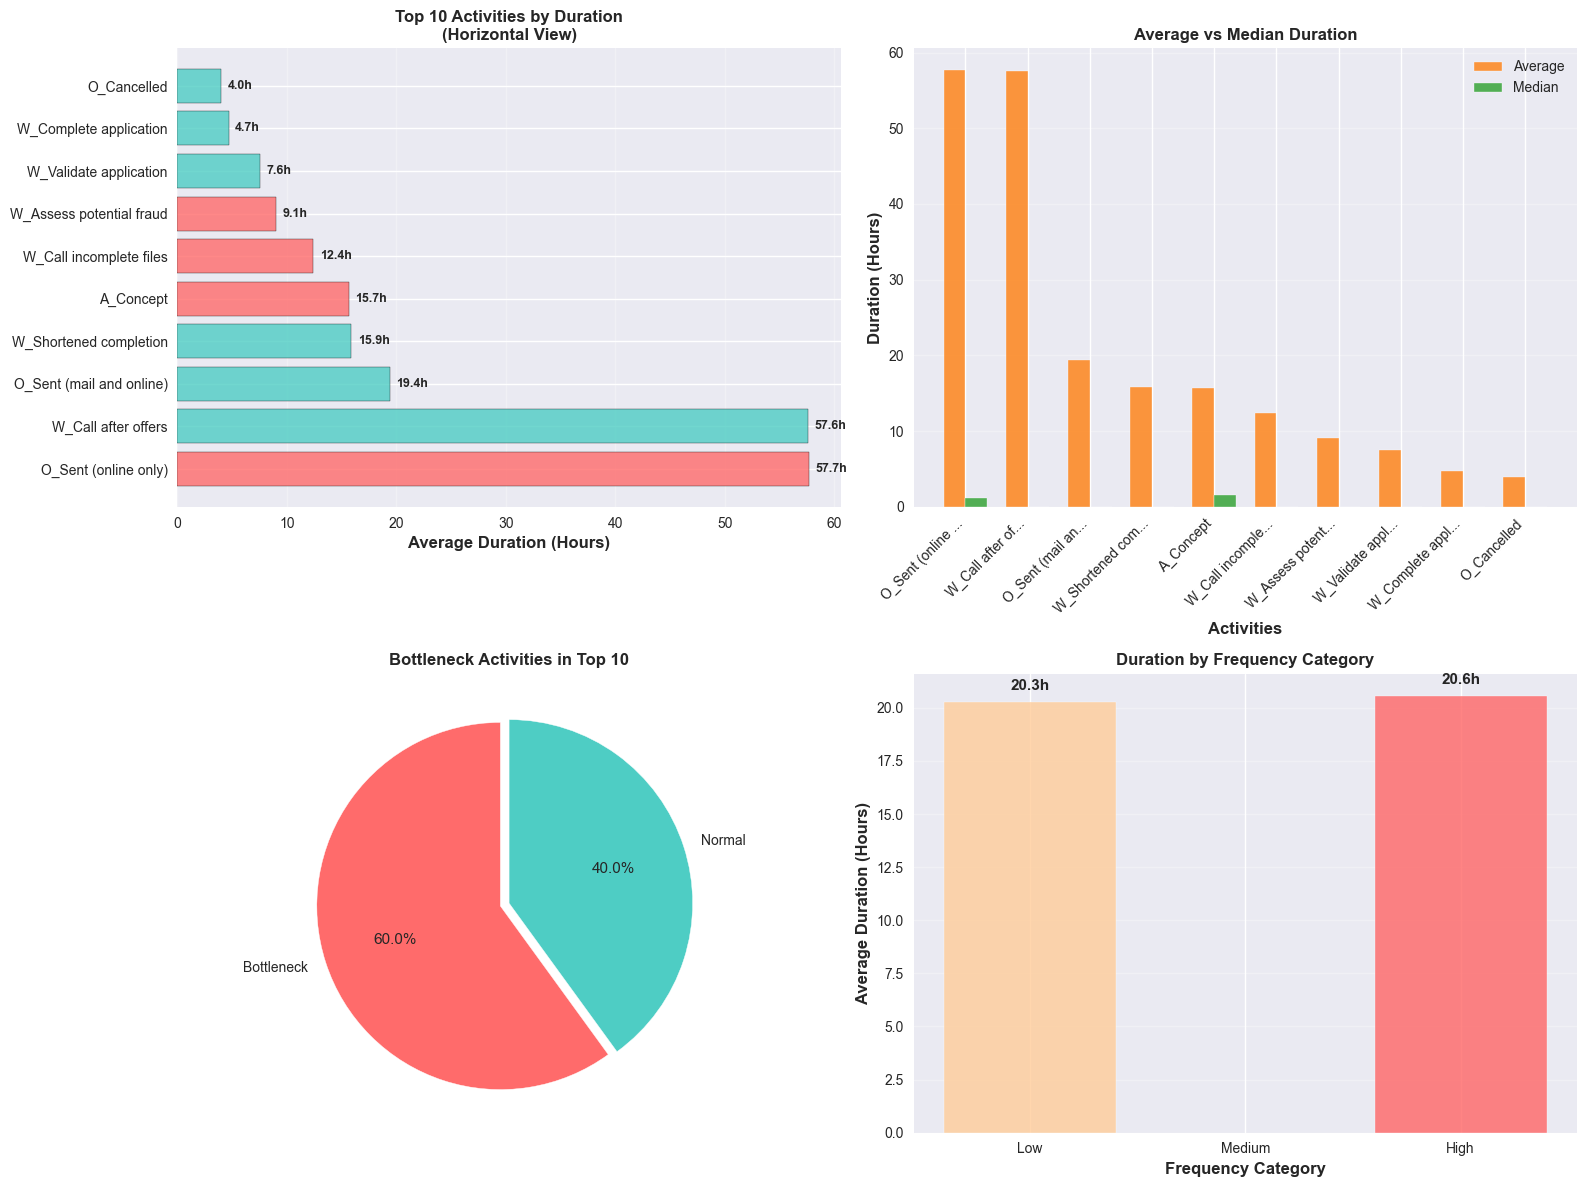

In [7]:
# Create a more detailed analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Horizontal bar chart with better readability
y_pos = np.arange(len(top_10_activities))
colors_bottleneck = ['#ff6b6b' if bottleneck else '#4ecdc4' for bottleneck in top_10_activities['is_bottleneck']]

bars = ax1.barh(y_pos, top_10_activities['avg_duration'], color=colors_bottleneck, alpha=0.8, edgecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top_10_activities['name'], fontsize=10)
ax1.set_xlabel('Average Duration (Hours)', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Activities by Duration\n(Horizontal View)', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_10_activities['avg_duration'])):
    width = bar.get_width()
    ax1.text(width + max(top_10_activities['avg_duration']) * 0.01, bar.get_y() + bar.get_height()/2,
            f'{value:.1f}h', ha='left', va='center', fontweight='bold', fontsize=9)

# 2. Average vs Median Duration Comparison
x = np.arange(len(top_10_activities))
width = 0.35

bars1 = ax2.bar(x - width/2, top_10_activities['avg_duration'], width, label='Average', color='#ff7f0e', alpha=0.8)
bars2 = ax2.bar(x + width/2, top_10_activities['median_duration'], width, label='Median', color='#2ca02c', alpha=0.8)

ax2.set_xlabel('Activities', fontsize=12, fontweight='bold')
ax2.set_ylabel('Duration (Hours)', fontsize=12, fontweight='bold')
ax2.set_title('Average vs Median Duration', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([name[:15] + '...' if len(name) > 15 else name for name in top_10_activities['name']], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Bottleneck Analysis
bottleneck_counts = top_10_activities['is_bottleneck'].value_counts()
colors_pie = ['#ff6b6b', '#4ecdc4']
labels = ['Bottleneck', 'Normal']

wedges, texts, autotexts = ax3.pie(bottleneck_counts.values, labels=labels, colors=colors_pie, 
                                  autopct='%1.1f%%', startangle=90, explode=(0.05, 0))
ax3.set_title('Bottleneck Activities in Top 10', fontsize=12, fontweight='bold')

# 4. Duration vs Frequency Analysis
# Create bins for frequency
freq_bins = pd.cut(top_10_activities['frequency'], bins=3, labels=['Low', 'Medium', 'High'])
duration_by_freq = top_10_activities.groupby(freq_bins)['avg_duration'].mean()

bars = ax4.bar(duration_by_freq.index, duration_by_freq.values, color=['#ffcc99', '#ff9999', '#ff6666'], alpha=0.8)
ax4.set_xlabel('Frequency Category', fontsize=12, fontweight='bold')
ax4.set_ylabel('Average Duration (Hours)', fontsize=12, fontweight='bold')
ax4.set_title('Duration by Frequency Category', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars, duration_by_freq.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + max(duration_by_freq.values) * 0.02,
            f'{value:.1f}h', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
## Summary Statistics and Insights


In [8]:
# Calculate summary statistics
print("=== ACTIVITY DURATION ANALYSIS SUMMARY ===")
print(f"\nDataset Overview:")
print(f"• Total activities analyzed: {len(df_positive)}")
print(f"• Activities with negative durations (excluded): {len(df) - len(df_positive)}")
print(f"• Top 10 activities represent: {top_10_activities['frequency'].sum():,} events")
print(f"• Percentage of total events: {top_10_activities['frequency'].sum() / 181063 * 100:.1f}%")

print(f"\nDuration Insights:")
print(f"• Longest average duration: {top_10_activities.iloc[0]['name']} ({top_10_activities.iloc[0]['avg_duration']:.2f} hours)")
print(f"• Shortest average duration (in top 10): {top_10_activities.iloc[-1]['name']} ({top_10_activities.iloc[-1]['avg_duration']:.2f} hours)")
print(f"• Most frequent activity (in top 10): {top_10_activities.loc[top_10_activities['frequency'].idxmax(), 'name']} ({top_10_activities['frequency'].max():,} occurrences)")

print(f"\nBottleneck Analysis:")
bottleneck_activities = top_10_activities[top_10_activities['is_bottleneck'] == True]
print(f"• Bottleneck activities in top 10: {len(bottleneck_activities)}/{len(top_10_activities)}")
print(f"• Average duration of bottlenecks: {bottleneck_activities['avg_duration'].mean():.2f} hours")
print(f"• Average duration of non-bottlenecks: {top_10_activities[top_10_activities['is_bottleneck'] == False]['avg_duration'].mean():.2f} hours")

print(f"\nKey Activities:")
for idx, row in top_10_activities.head(5).iterrows():
    status = "(BOTTLENECK)" if row['is_bottleneck'] else ""
    print(f"• {row['name']}: {row['avg_duration']:.2f}h avg, {row['frequency']:,} occurrences {status}")


=== ACTIVITY DURATION ANALYSIS SUMMARY ===

Dataset Overview:
• Total activities analyzed: 20
• Activities with negative durations (excluded): 5
• Top 10 activities represent: 118,019 events
• Percentage of total events: 65.2%

Duration Insights:
• Longest average duration: O_Sent (online only) (57.72 hours)
• Shortest average duration (in top 10): O_Cancelled (4.00 hours)
• Most frequent activity (in top 10): W_Validate application (29,934 occurrences)

Bottleneck Analysis:
• Bottleneck activities in top 10: 4/10
• Average duration of bottlenecks: 23.72 hours
• Average duration of non-bottlenecks: 18.20 hours

Key Activities:
• O_Sent (online only): 57.72h avg, 299 occurrences (BOTTLENECK)
• W_Call after offers: 57.62h avg, 27,417 occurrences 
• O_Sent (mail and online): 19.43h avg, 5,974 occurrences 
• W_Shortened completion: 15.89h avg, 46 occurrences 
• A_Concept: 15.67h avg, 4,724 occurrences (BOTTLENECK)


In [ ]:
## Process Improvement Recommendations


In [9]:
# Generate recommendations based on the analysis
print("=== PROCESS IMPROVEMENT RECOMMENDATIONS ===")
print()

# Focus on high-duration, high-frequency activities
high_impact = top_10_activities[
    (top_10_activities['avg_duration'] > top_10_activities['avg_duration'].median()) & 
    (top_10_activities['frequency'] > top_10_activities['frequency'].median())
]

print("🎯 HIGH PRIORITY - Focus on these activities for maximum impact:")
for idx, row in high_impact.iterrows():
    impact_score = row['avg_duration'] * row['frequency']
    print(f"   • {row['name']}: {row['avg_duration']:.1f}h avg × {row['frequency']:,} times = {impact_score:.0f} total hours")

print("\n🔴 BOTTLENECK ACTIVITIES - Require immediate attention:")
for idx, row in bottleneck_activities.iterrows():
    print(f"   • {row['name']}: {row['avg_duration']:.2f}h average duration")

print("\n📊 ANALYSIS INSIGHTS:")
print(f"   • The top 3 activities account for {top_10_activities.head(3)['avg_duration'].sum():.1f} hours of average process time")
print(f"   • Online-only sending takes {top_10_activities.iloc[0]['avg_duration']:.1f}h vs {top_10_activities[top_10_activities['name'].str.contains('mail and online')]['avg_duration'].iloc[0]:.1f}h for mail+online")
print(f"   • Call-related activities show high duration variability, suggesting inconsistent handling")

print("\n💡 RECOMMENDATIONS:")
print("   1. Optimize 'O_Sent (online only)' process - highest duration activity")
print("   2. Streamline 'W_Call after offers' - high frequency AND high duration")
print("   3. Investigate 'O_Sent (mail and online)' efficiency gains")
print("   4. Focus on bottleneck activities marked in red in visualizations")
print("   5. Consider automation for high-frequency, low-complexity activities")


=== PROCESS IMPROVEMENT RECOMMENDATIONS ===

🎯 HIGH PRIORITY - Focus on these activities for maximum impact:
   • W_Call after offers: 57.6h avg × 27,417 times = 1579719 total hours
   • O_Sent (mail and online): 19.4h avg × 5,974 times = 116061 total hours

🔴 BOTTLENECK ACTIVITIES - Require immediate attention:
   • O_Sent (online only): 57.72h average duration
   • A_Concept: 15.67h average duration
   • W_Call incomplete files: 12.43h average duration
   • W_Assess potential fraud: 9.05h average duration

📊 ANALYSIS INSIGHTS:
   • The top 3 activities account for 134.8 hours of average process time
   • Online-only sending takes 57.7h vs 19.4h for mail+online
   • Call-related activities show high duration variability, suggesting inconsistent handling

💡 RECOMMENDATIONS:
   1. Optimize 'O_Sent (online only)' process - highest duration activity
   2. Streamline 'W_Call after offers' - high frequency AND high duration
   3. Investigate 'O_Sent (mail and online)' efficiency gains
   4.

In [ ]:
## Data Export for Further Analysis


In [10]:
# Export the analysis results
export_df = top_10_activities[['name', 'avg_duration', 'median_duration', 'frequency', 'is_bottleneck']].copy()
export_df['avg_duration_minutes'] = export_df['avg_duration'] * 60
export_df['median_duration_minutes'] = export_df['median_duration'] * 60
export_df['impact_score'] = export_df['avg_duration'] * export_df['frequency']

# Save to CSV
export_df.to_csv('bpi2017_top10_activity_durations.csv', index=False)
print("✅ Results exported to 'bpi2017_top10_activity_durations.csv'")

# Display final summary table
print("\n📋 FINAL SUMMARY TABLE:")
display_df = export_df[['name', 'avg_duration', 'frequency', 'is_bottleneck', 'impact_score']].copy()
display_df.columns = ['Activity', 'Avg Duration (h)', 'Frequency', 'Bottleneck', 'Impact Score']
print(display_df.to_string(index=False, float_format='%.2f'))


✅ Results exported to 'bpi2017_top10_activity_durations.csv'

📋 FINAL SUMMARY TABLE:
                Activity  Avg Duration (h)  Frequency  Bottleneck  Impact Score
    O_Sent (online only)             57.72        299        True      17258.12
     W_Call after offers             57.62      27417       False    1579718.57
O_Sent (mail and online)             19.43       5974       False     116060.73
  W_Shortened completion             15.89         46       False        730.72
               A_Concept             15.67       4724        True      74021.16
 W_Call incomplete files             12.43      24805        True     308364.52
W_Assess potential fraud              9.05        480        True       4344.39
  W_Validate application              7.56      29934       False     226347.79
  W_Complete application              4.69      21878       False     102665.81
             O_Cancelled              4.00       2462       False       9845.41
